In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import inflect
%matplotlib inline
plt.style.use('ggplot')
p=inflect.engine()

In [12]:
df = pd.read_csv('data/pbp-2020.csv')
df.drop(['Unnamed: 10', 'Unnamed: 12', 'Unnamed: 16', 'Unnamed: 17', 'Challenger', 'IsMeasurement'], axis=1, inplace=True) # Removing empty columns

In [13]:
def is_success(row):
    if row['Down']==1 and row['Yards']/row['ToGo']>=.4:
        return 1
    elif row['Down']==2 and row['Yards']/row['ToGo']>=.60:
        return 1
    elif (row['Down']==3 or row['Down']==4) and row['Yards']>=row['ToGo']:
        return 1
    else:
        return 0

In [14]:
df.sort_values(['GameId', 'Quarter', 'Minute', 'Second'], ascending=[True, True, False, False], inplace=True) #Sorted by game and ordered by game time
df = df[df['PlayType'].notnull()]                                     # Removed null values associated with procedural warnings ie Two-Minute Warnings
df = df[df['PlayType']!='TIMEOUT']                                    # Removed timeouts
df = df[df['IsNoPlay']==0]                                            # Removed plays where the result of the play was called back
df['IsSuccess'] = df.apply(lambda row: is_success(row), axis=1)       # Added a column indicating whether or not the play was a success
rush_plays = df[df['IsRush']==1]                                      # Group Rush plays
pass_plays = df[df['IsPass']==1]                                      # Group Pass plays
teams = ['LV', 'MIN', 'TB', 'ARI', 'DEN', 'MIA', 'NYJ', 'CLE', 'NYG',
       'BAL', 'CIN', 'HOU', 'CHI', 'IND', 'PIT', 'DAL', 'WAS', 'SEA',
       'LA', 'CAR', 'TEN', 'BUF', 'KC', 'GB', 'ATL', 'NE', 'JAX', 'SF',
       'LAC', 'PHI', 'DET', 'NO']
Is_list = ['IsRush', 'IsPass', 'IsIncomplete', 'IsTouchdown', 'IsSack', 'IsChallenge', 'IsChallengeReversed', 'IsMeasurement', 'IsInterception',
    'IsFumble', 'IsPenalty', 'IsTwoPointConversion', 'IsTwoPointConversionSuccessful', 'IsPenaltyAccepted', 'IsNoPlay']
formations = ['UNDER CENTER', 'SHOTGUN', 'NO HUDDLE SHOTGUN', 'NO HUDDLE']

In [167]:
def yards_per_is_stat(stat):
    stat_df = df.groupby('OffenseTeam').sum().sort_values(stat, ascending=False)[stat]
    

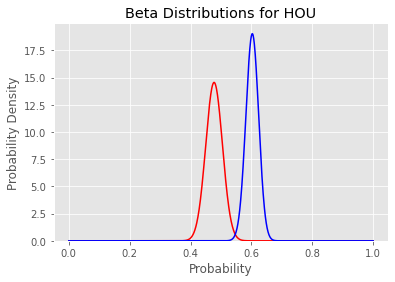

In [168]:
graph_beta_dist('HOU')

In [16]:
# TTesting
r = rush_plays['IsSuccess']
p = pass_plays['IsSuccess']
total_plays = 31049         # Found by adding running .count on rush plays and pass plays then adding.
stats.ttest_ind(r,p)

Ttest_indResult(statistic=-1.6440838394522952, pvalue=0.10016901040981621)

<ipython-input-174-a620d7ce7d2a>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  return fig.show()


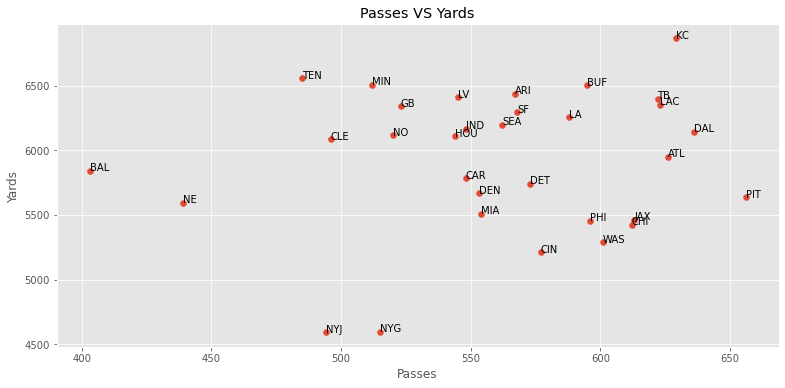

In [177]:
compare_team_is_stats('IsPass','Yards')